In [7]:
import matplotlib.pyplot as plt
from utils import test_combinations, plot_results
from load_embeddings import load_embedding_model
from wordlist import mammals, birds, colors, fruits

# model, tokenizer = load_embedding_model(
#     151936, 1536,
#     "embeddings_qwen.pth",
#     "unembeddings_qwen.pth",
#     "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
# )
vocab_size = 151936
dimensions = 1536
project_dir = "/Users/wuyuchen/Desktop/SCCOT/" # adjust this path to yours
model, tokenizer = load_embedding_model(
    vocab_size,
    dimensions,
    f"{project_dir}/embeddings_qwen.pth",
    f"{project_dir}/unembedding_qwen.pth",
    "deepseek-ai/DeepSeek-R1-Distill-Qwen-1.5B"
)
model.eval()

/Users/wuyuchen/Desktop/superposition-in-continuous-chain-of-thought/load_embeddings.py:40: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  emb_weight = torch.load(embeddings_

SimpleModel(
  (embedding): Embedding(151936, 1536)
  (unembedding): Linear(in_features=1536, out_features=151936, bias=False)
)

[test_combinations] Skipping n=15: only 13 single-token candidates available.
[test_combinations] Skipping n=20: only 13 single-token candidates available.
[test_combinations] Skipping n=10: only 8 single-token candidates available.
[test_combinations] Skipping n=15: only 8 single-token candidates available.
[test_combinations] Skipping n=20: only 8 single-token candidates available.


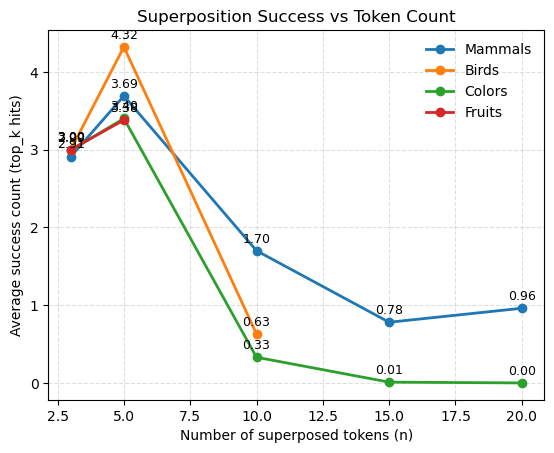

In [8]:
res_mammals = test_combinations(mammals, model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_birds   = test_combinations(birds,   model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_colors  = test_combinations(colors,  model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)
res_fruits  = test_combinations(fruits,  model, tokenizer, n_values=[3,5,10,15,20], num_trials=100, top_k=30)

plot_results(res_mammals, title="Mammals")
plot_results(res_birds,   title="Birds")
plot_results(res_colors,  title="Colors")
plot_results(res_fruits,  title="Fruits")

plt.show()